# Module 2 Homework

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Read Dataset

In [68]:
# Read the raw data
data_df = pd.read_csv("https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv", engine="pyarrow")

In [69]:
# Verify data load
data_df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [70]:
len(data_df)

9704

## Preparing the Dataset

In [71]:
# List columns and data types
data_df.dtypes

engine_displacement      int64
num_cylinders          float64
horsepower             float64
vehicle_weight         float64
acceleration           float64
model_year               int64
origin                  object
fuel_type               object
drivetrain              object
num_doors              float64
fuel_efficiency_mpg    float64
dtype: object

Use only the following columns:
- `'engine_displacement'`
- `'horsepower'`
- `'vehicle_weight'`
- `'model_year'`
- `'fuel_efficiency_mpg'`

In [72]:
cols = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']
analysis_df = data_df[cols].copy()



## EDA

- Look at the `fuel_efficiency_mpg` variable. Does it have a long tail? 

**No**

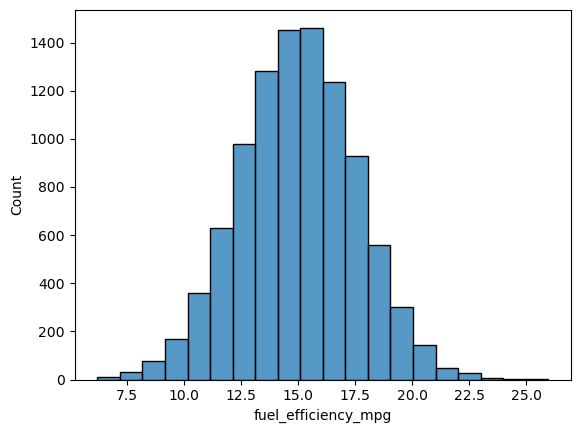

In [73]:
sns.histplot(analysis_df.fuel_efficiency_mpg, bins=20)
plt.show()

### Question 1

There's one column with missing values. What is it?
- `'engine_displacement'`
- **`'horsepower'`**
- `'vehicle_weight'`
- `'model_year'`


In [74]:
analysis_df.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

### Question 2

What's the median (50% percentile) for variable `'horsepower'`? 

**149**

In [75]:
analysis_df.horsepower.median()

149.0

## Prepare and split the dataset
- Shuffle the dataset (the filtered one you created above), use seed `42`.
- Split your data in train/val/test sets, with 60%/20%/20% distribution.

Use the same code as in the lectures.

In [76]:
n = len(analysis_df)

n_val = n_test = int(n * 0.2)
n_train = n - n_val - n_test

print(n, n_train, n_val, n_test)

9704 5824 1940 1940


In [77]:
# Create an array of indices
idx = np.arange(n)

# Set random seed
np.random.seed(42)

# Shuffle the indices
np.random.shuffle(idx)

# Split the dataset
df_train = analysis_df.iloc[idx[:n_train]].copy()
df_val = analysis_df.iloc[idx[n_train:n_train + n_val]].copy()
df_test = analysis_df.iloc[idx[n_train + n_val:]].copy()


In [78]:
len(df_train), len(df_val), len(df_test)

(5824, 1940, 1940)

In [79]:
df_test.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
3729,140,148.0,2704.826005,2017,15.804354
7764,210,136.0,3001.227490,2004,14.272374
4358,210,152.0,3747.467392,2021,11.748441
5922,190,128.0,2705.833636,2014,16.485991
1343,230,156.0,2505.939657,2005,17.779704


In [80]:
for df in (df_train, df_val, df_test):
    df.reset_index(drop=True, inplace=True)
df_test.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,140,148.0,2704.826005,2017,15.804354
1,210,136.0,3001.227490,2004,14.272374
2,210,152.0,3747.467392,2021,11.748441
3,190,128.0,2705.833636,2014,16.485991
4,230,156.0,2505.939657,2005,17.779704


In [81]:
df_train.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,220,144.0,2535.887591,2009,16.642943
1,160,141.0,2741.170484,2019,16.298377
2,230,155.0,2471.880237,2017,18.591822
3,150,206.0,3748.164469,2015,11.818843
4,300,111.0,2135.716359,2006,19.402209


In [82]:
# Create labels
y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

In [83]:
# Remove labels from dataframes
for df in (df_train, df_val, df_test):
    df.drop(columns=['fuel_efficiency_mpg'], inplace=True)
df_train.columns

Index(['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year'], dtype='object')

In [84]:
len(y_train), len(y_val), len(y_test)

(5824, 1940, 1940)

In [85]:
df_train.isnull().sum()

engine_displacement      0
horsepower             429
vehicle_weight           0
model_year               0
dtype: int64

### Question 3

- We need to deal with missing values for the column from Q1.
- We have two options: fill it with 0 or with the mean of this variable.
- Try both options. For each, train a linear regression model without regularization using the code from the lessons.
- For computing the mean, use the training only!
- Use the validation dataset to evaluate the models and compare the RMSE of each option.
- Round the RMSE scores to 2 decimal digits using round(score, 2)
- Which option gives better RMSE?

Options:

- With 0
- **With mean**
- Both are equally good

#### Option 1: Fill with zeroes

- Fill missing values in `horsepower` column with zeroes.
- Train a linear regression model without regularization
- Produce RMSE, round to 2 decimal digits

In [86]:
def prepare_X(df: pd.DataFrame, fill_method: str = 'zero') -> np.ndarray:
    df = df.copy()
    if fill_method == 'zero':
        df = df.fillna(0)
    elif fill_method == 'mean':
        mean_horsepower = df_train.horsepower.mean()
        df = df.fillna(mean_horsepower)
    else:
        raise ValueError("fill_method must be 'zero' or 'mean'")
    
    return df.values

In [87]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [88]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [91]:
X_train = prepare_X(df_train, fill_method='zero')
w0, w = train_linear_regression(X_train, y_train)
X_val = prepare_X(df_val, fill_method='zero')
y_val_pred = w0 + X_val.dot(w)
rmse_val_zero = rmse(y_val, y_val_pred)
print(f"Validation RMSE (fill with zeroes): {round(rmse_val_zero, 2)}")

Validation RMSE (fill with zeroes): 0.52


In [92]:
# Now train with mean
X_train = prepare_X(df_train, fill_method='mean')
w0, w = train_linear_regression(X_train, y_train)
X_val = prepare_X(df_val, fill_method='mean')
y_val_pred = w0 + X_val.dot(w)
rmse_val_mean = rmse(y_val, y_val_pred)
print(f"Validation RMSE (fill with mean): {round(rmse_val_mean, 2)}")

Validation RMSE (fill with mean): 0.46


In [93]:
rmse_val_zero > rmse_val_mean

np.True_

### Question 4

- Now let's train a regularized linear regression.
- For this question, fill the NAs with 0.
- Try different values of r from this list: [0, 0.01, 0.1, 1, 5, 10, 100].
- Use RMSE to evaluate the model on the validation dataset.
- Round the RMSE scores to 2 decimal digits.
- Which r gives the best RMSE?
- If multiple options give the same best RMSE, select the smallest r.

Options:

- 0
- **0.01**
- 1
- 10
- 100


In [94]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [ ]:
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    X_train = prepare_X(df_train, fill_method='zero')
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)
    X_val = prepare_X(df_val, fill_method='zero')
    y_val_pred = w0 + X_val.dot(w)
    rmse_val = rmse(y_val, y_val_pred)
    print(f"Validation RMSE (r={r}): {rmse_val}")



Validation RMSE (r=0): 0.517378263883769
Validation RMSE (r=0.01): 0.5171115525774069
Validation RMSE (r=0.1): 0.5187525130701818
Validation RMSE (r=1): 0.5222348802092905
Validation RMSE (r=5): 0.5228916092823563
Validation RMSE (r=10): 0.52298129796366
Validation RMSE (r=100): 0.523063623381993


### Question 5

- We used seed `42` for splitting the data. Let's find out how selecting the seed influences our score.
- Try different seed values: `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`.
- For each seed, do the train/validation/test split with 60%/20%/20% distribution.
- Fill the missing values with 0 and train a model without regularization.
- For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
- What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
- Round the result to 3 decimal digits (round(std, 3))

What's the value of std?

- 0.001
- **0.006**
- 0.060
- 0.600

> Note: Standard deviation shows how different the values are. If it's low, then all values are approximately the same. If it's high, the values are different. If standard deviation of scores is low, then our model is stable.

In [100]:
def create_split(seed):
    n = len(analysis_df)

    n_val = n_test = int(n * 0.2)
    n_train = n - n_val - n_test

    # Create an array of indices
    idx = np.arange(n)

    # Set random seed
    np.random.seed(seed)

    # Shuffle the indices
    np.random.shuffle(idx)

    # Split the dataset
    df_train = analysis_df.iloc[idx[:n_train]].copy()
    df_val = analysis_df.iloc[idx[n_train:n_train + n_val]].copy()
    df_test = analysis_df.iloc[idx[n_train + n_val:]].copy()

    for df in (df_train, df_val, df_test):
        df.reset_index(drop=True, inplace=True)

    # Create labels
    y_train = df_train.fuel_efficiency_mpg.values
    y_val = df_val.fuel_efficiency_mpg.values
    y_test = df_test.fuel_efficiency_mpg.values

    # Remove labels from dataframes
    for df in (df_train, df_val, df_test):
        df.drop(columns=['fuel_efficiency_mpg'], inplace=True)
    
    return df_train, y_train, df_val, y_val, df_test, y_test

In [101]:
for seed in range(10):
    df_train, y_train, df_val, y_val, df_test, y_test = create_split(seed)
    X_train = prepare_X(df_train, fill_method='zero')
    w0, w = train_linear_regression(X_train, y_train)
    X_val = prepare_X(df_val, fill_method='zero')
    y_val_pred = w0 + X_val.dot(w)
    rmse_val = rmse(y_val, y_val_pred)
    print(f"Seed {seed}: Validation RMSE: {rmse_val}")

Seed 0: Validation RMSE: 0.5206531296286034
Seed 1: Validation RMSE: 0.521338891286213
Seed 2: Validation RMSE: 0.522806997464668
Seed 3: Validation RMSE: 0.5159516741272654
Seed 4: Validation RMSE: 0.510912946010048
Seed 5: Validation RMSE: 0.5283406460150384
Seed 6: Validation RMSE: 0.5313910658199211
Seed 7: Validation RMSE: 0.5090670387337807
Seed 8: Validation RMSE: 0.5147399129384673
Seed 9: Validation RMSE: 0.5131865908366473


In [106]:
# Collect RMSE scores
rmse_scores = []

for seed in range(10):
    df_train, y_train, df_val, y_val, df_test, y_test = create_split(seed)
    X_train = prepare_X(df_train, fill_method='zero')
    w0, w = train_linear_regression(X_train, y_train)
    X_val = prepare_X(df_val, fill_method='zero')
    y_val_pred = w0 + X_val.dot(w)
    rmse_val = rmse(y_val, y_val_pred)
    rmse_scores.append(rmse_val)
    print(f"Seed {seed}: Validation RMSE: {rmse_val}")

# Convert to numpy array and calculate standard deviation
rmse_array = np.array(rmse_scores)
std_deviation = np.std(rmse_array)
print(f"\nStandard deviation of RMSE scores: {round(std_deviation, 3)}")

Seed 0: Validation RMSE: 0.5206531296286034
Seed 1: Validation RMSE: 0.521338891286213
Seed 2: Validation RMSE: 0.522806997464668
Seed 3: Validation RMSE: 0.5159516741272654
Seed 4: Validation RMSE: 0.510912946010048
Seed 5: Validation RMSE: 0.5283406460150384
Seed 6: Validation RMSE: 0.5313910658199211
Seed 7: Validation RMSE: 0.5090670387337807
Seed 8: Validation RMSE: 0.5147399129384673
Seed 9: Validation RMSE: 0.5131865908366473

Standard deviation of RMSE scores: 0.007


### Question 6
- Split the dataset like previously, use seed 9.
- Combine train and validation datasets.
- Fill the missing values with 0 and train a model with `r=0.001`.
- What's the RMSE on the test dataset?

Options:

- 0.15
- **0.515**
- 5.15
- 51.5


In [107]:
# split dataset with seed 9
df_train, y_train, df_val, y_val, df_test, y_test = create_split(9)

# Create combined train + val set
df_train_full = pd.concat([df_train, df_val]).reset_index(drop=True)

# Create combined labels
y_train_full = np.concatenate([y_train, y_val])

X_train_full = prepare_X(df_train_full, fill_method='zero')
w0, w = train_linear_regression_reg(X_train_full, y_train_full, r=0.001)
X_test = prepare_X(df_test, fill_method='zero')
y_test_pred = w0 + X_test.dot(w)
rmse_test = rmse(y_test, y_test_pred)
print(f"Seed 9: Test RMSE: {rmse_test}")

Seed 9: Test RMSE: 0.5156261299162685
